In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('../colorectal_cancer_prediction.csv')
df.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


In [3]:
X = df.drop(columns=["Patient_ID","Survival_Status"])
y = df["Survival_Status"]

In [4]:
# One-hot encode categorical features
cat_columns = X.select_dtypes(include=["object"]).columns  # Detect categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_columns])

# Convert to DataFrame and merge with numeric features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(cat_columns))
X_numeric = X.select_dtypes(exclude=["object"])  # Keep numeric columns
X_final = pd.concat([X_numeric, X_encoded_df], axis=1)  # Final dataset

In [5]:
X_final

,Age,BMI,Time_to_Recurrence,Gender_Female,Gender_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,...,Chemotherapy_Received_No,Chemotherapy_Received_Yes,Radiotherapy_Received_No,Radiotherapy_Received_Yes,Surgery_Received_No,Surgery_Received_Yes,Follow_Up_Adherence_Good,Follow_Up_Adherence_Poor,Recurrence_No,Recurrence_Yes
0,71,33.0,16,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,34,33.1,28,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,80,20.7,26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,40,38.9,44,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,43,24.8,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89940,72,38.9,25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
89941,59,32.6,46,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
89942,77,35.4,41,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
89943,37,31.2,47,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [6]:
y.value_counts()

Survival_Status
Survived    67341
Deceased    22604
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=123 , stratify=y
)

In [8]:
y_test.value_counts()

Survival_Status
Survived    13468
Deceased     4521
Name: count, dtype: int64

In [10]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6067596864750681
Classification Report:
               precision    recall  f1-score   support

    Deceased       0.25      0.28      0.26      4521
    Survived       0.75      0.72      0.73     13468

    accuracy                           0.61     17989
   macro avg       0.50      0.50      0.50     17989
weighted avg       0.62      0.61      0.61     17989



In [11]:
# Get feature importance scores
importance_scores = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame(
    {"Feature": X_final.columns, "Importance": importance_scores}
)

# Sort by importance (highest first)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top features
print(feature_importance_df.head(10))  # Show top 10 most important features

                        Feature  Importance
0                           Age    0.121354
2            Time_to_Recurrence    0.118347
1                           BMI    0.114150
49     Red_Meat_Consumption_Low    0.013476
50  Red_Meat_Consumption_Medium    0.013278
26       Stage_at_Diagnosis_III    0.013223
24         Stage_at_Diagnosis_I    0.012919
14         Region_North America    0.012406
40  Physical_Activity_Level_Low    0.012174
48    Red_Meat_Consumption_High    0.012013


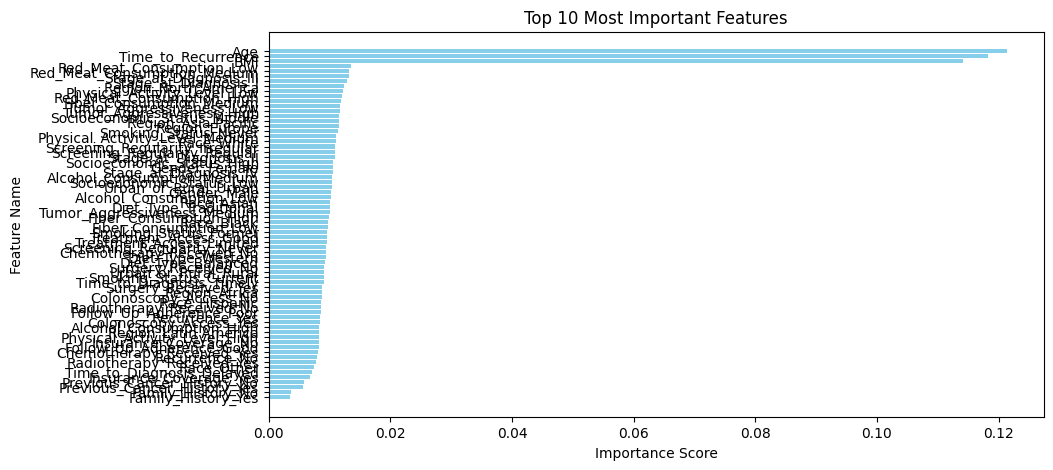

In [12]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df["Feature"][:], feature_importance_df["Importance"][:], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

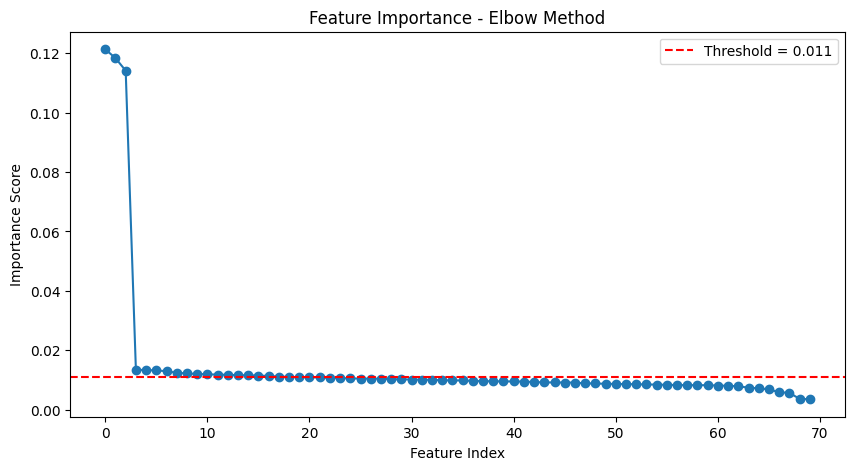

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(feature_importance_df)), feature_importance_df["Importance"], marker="o", linestyle="-")
plt.axhline(y=0.011, color="r", linestyle="--", label="Threshold = 0.011")  # Example threshold
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Elbow Method")
plt.legend()
plt.show()

In [14]:
# Select features with importance above a threshold (e.g., 0.01)
selected_features = feature_importance_df[feature_importance_df["Importance"] > 0.011]["Feature"].tolist()

# Keep only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new model with selected features
model_selected = DecisionTreeClassifier(max_depth = 40, random_state=123)
model_selected.fit(X_train_selected, y_train)

# Evaluate the new model
y_pred_selected = model_selected.predict(X_test_selected)
print("Accuracy after feature selection:", accuracy_score(y_test, y_pred_selected))
print("Classification Report:\n", classification_report(y_test, y_pred_selected))

Accuracy after feature selection: 0.6069820445828006
Classification Report:
               precision    recall  f1-score   support

    Deceased       0.25      0.29      0.27      4521
    Survived       0.75      0.71      0.73     13468

    accuracy                           0.61     17989
   macro avg       0.50      0.50      0.50     17989
weighted avg       0.62      0.61      0.61     17989



In [50]:
model_selected.get_depth()

3

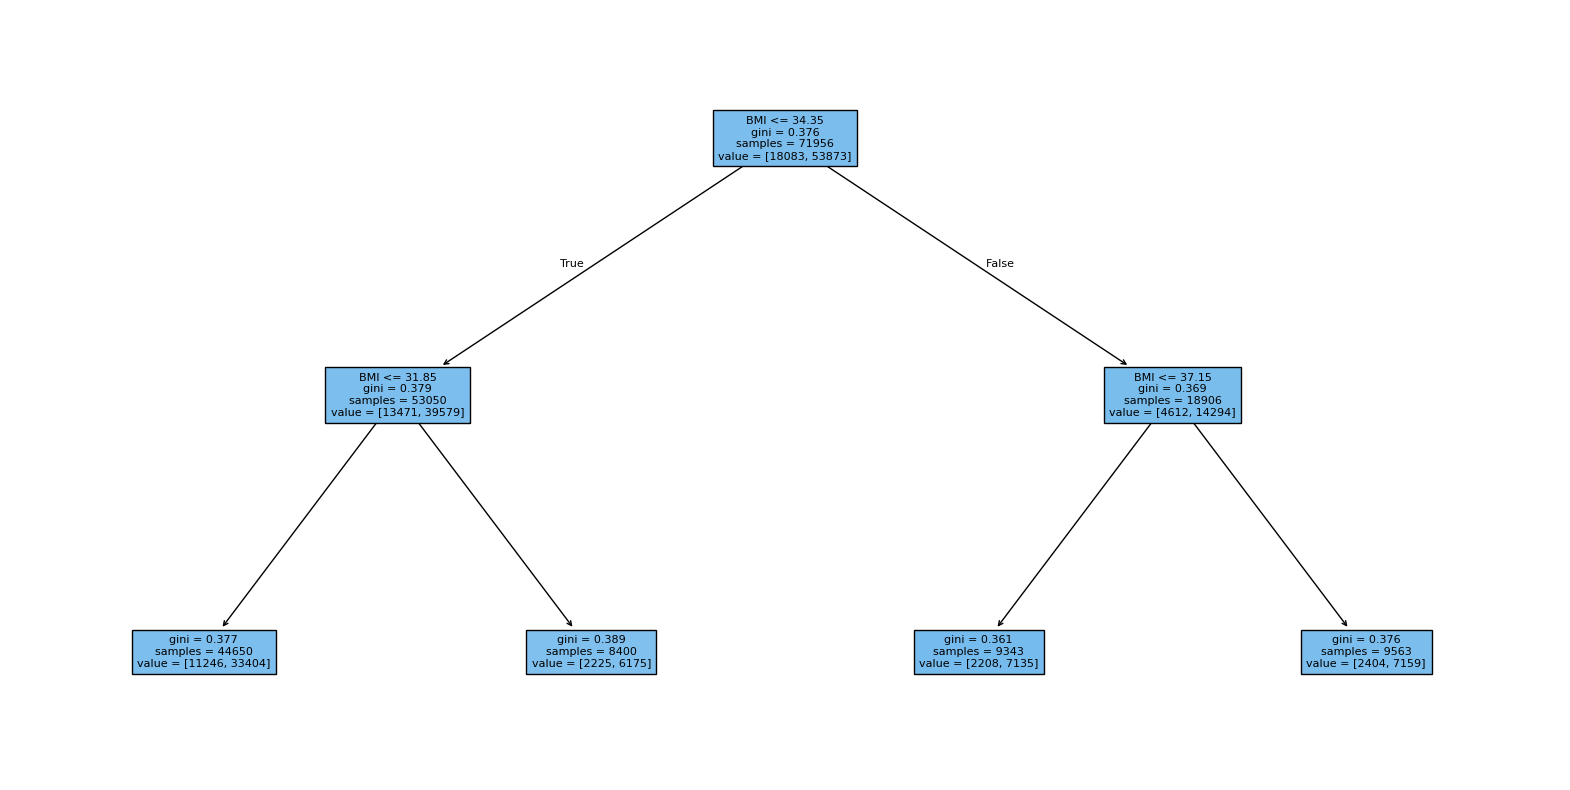

In [76]:
plt.figure(figsize=(20, 10))
plot_tree(model_selected,feature_names=X_train_selected.columns, filled=True, fontsize=8)
plt.show()